# Dementia Modeling

## Data Set Loading / Exploratory Data Analysis

In [14]:
# Import dependencies
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
# import tensorflow as tf
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Read in and display csv to dataframe
df = pd.read_csv('Resources/dementia_patients_health_data.csv')

df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


### Data Cleaning

In [3]:
# Check for missing values
df.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

In [4]:
# Replace missing dosage with 0
df['Dosage in mg'].fillna(0, inplace=True)

# Fill missing 'Prescription' values with None
df['Prescription'].fillna('None', inplace=True)

# Fill missing 'Prescription' values with None
df['Chronic_Health_Conditions'].fillna('None', inplace=True)

# Confirm changes
df.isnull().sum()

Diabetic                     0
AlcoholLevel                 0
HeartRate                    0
BloodOxygenLevel             0
BodyTemperature              0
Weight                       0
MRI_Delay                    0
Prescription                 0
Dosage in mg                 0
Age                          0
Education_Level              0
Dominant_Hand                0
Gender                       0
Family_History               0
Smoking_Status               0
APOE_ε4                      0
Physical_Activity            0
Depression_Status            0
Cognitive_Test_Scores        0
Medication_History           0
Nutrition_Diet               0
Sleep_Quality                0
Chronic_Health_Conditions    0
Dementia                     0
dtype: int64

In [5]:
# Determine the number of unique values in each column
df.nunique()

Diabetic                        2
AlcoholLevel                 1000
HeartRate                      41
BloodOxygenLevel             1000
BodyTemperature              1000
Weight                       1000
MRI_Delay                    1000
Prescription                    5
Dosage in mg                   11
Age                            31
Education_Level                 4
Dominant_Hand                   2
Gender                          2
Family_History                  2
Smoking_Status                  3
APOE_ε4                         2
Physical_Activity               3
Depression_Status               2
Cognitive_Test_Scores          11
Medication_History              2
Nutrition_Diet                  3
Sleep_Quality                   2
Chronic_Health_Conditions       4
Dementia                        2
dtype: int64

In [7]:
# Display the dataframe shape
print("Dataframe shape:", df.shape)

# Dataframe dtypes
df.info()

# Display basic statistical details
df.describe()

Dataframe shape: (1000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               1000 non-null   object 
 8   Dosage in mg               1000 non-null   float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History       

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,4.468500,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.453713,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,0.000000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,0.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,0.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,8.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


### Outlier Cleanup

In [8]:
# Calculate Z-scores for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_z_scores = df[numerical_cols].apply(stats.zscore)

# Identify outliers with 3 standard deviations
outliers = np.abs(df_z_scores) > 3

# List of total outliers present in numerical data
outlier_counts = outliers.sum()
outlier_counts

Diabetic                 0
AlcoholLevel             0
HeartRate                0
BloodOxygenLevel         0
BodyTemperature          0
Weight                   0
MRI_Delay                0
Dosage in mg             0
Age                      0
Cognitive_Test_Scores    0
Dementia                 0
dtype: int64

### Categorical Distributions

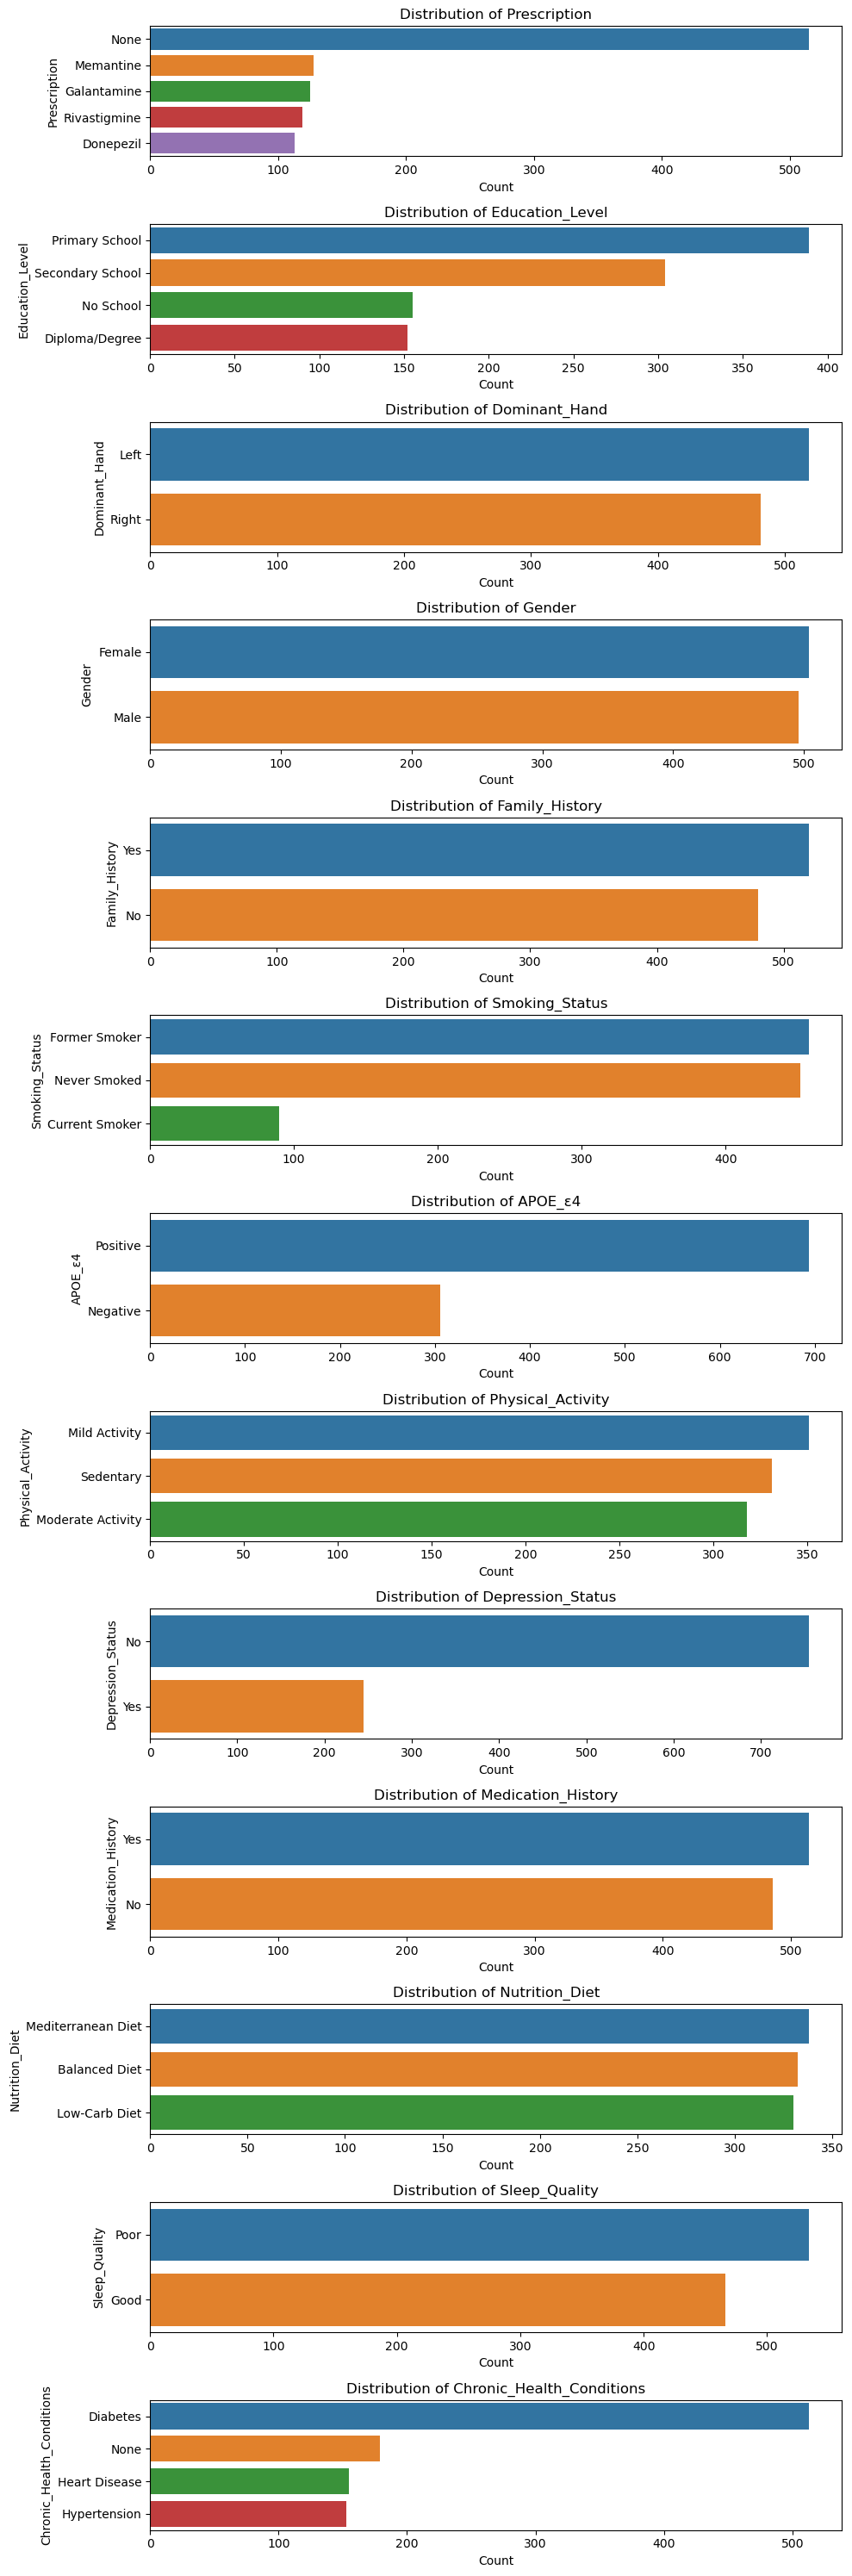

{'Prescription': Prescription
 None            515
 Memantine       128
 Galantamine     125
 Rivastigmine    119
 Donepezil       113
 Name: count, dtype: int64,
 'Education_Level': Education_Level
 Primary School      389
 Secondary School    304
 No School           155
 Diploma/Degree      152
 Name: count, dtype: int64,
 'Dominant_Hand': Dominant_Hand
 Left     519
 Right    481
 Name: count, dtype: int64,
 'Gender': Gender
 Female    504
 Male      496
 Name: count, dtype: int64,
 'Family_History': Family_History
 Yes    520
 No     480
 Name: count, dtype: int64,
 'Smoking_Status': Smoking_Status
 Former Smoker     458
 Never Smoked      452
 Current Smoker     90
 Name: count, dtype: int64,
 'APOE_ε4': APOE_ε4
 Positive    694
 Negative    306
 Name: count, dtype: int64,
 'Physical_Activity': Physical_Activity
 Mild Activity        351
 Sedentary            331
 Moderate Activity    318
 Name: count, dtype: int64,
 'Depression_Status': Depression_Status
 No     755
 Yes    245


In [9]:
# Set variable for all categorical variables
all_categorical_vars = df.select_dtypes(include=['object']).columns

# Set variable for the distribution of all categorical variables
all_categorical_summaries = {var: df[var].value_counts() for var in all_categorical_vars}

# Visualizing the distribution
fig, axs = plt.subplots(len(all_categorical_vars), 1, figsize=(10, 30))

# Loop through the categories
for i, var in enumerate(all_categorical_vars):
    sns.countplot(y=var, data=df, ax=axs[i], order = df[var].value_counts().index)
    axs[i].set_title(f'Distribution of {var}')
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel(var)

plt.tight_layout()
plt.show()

all_categorical_summaries

### Numerical Distributions

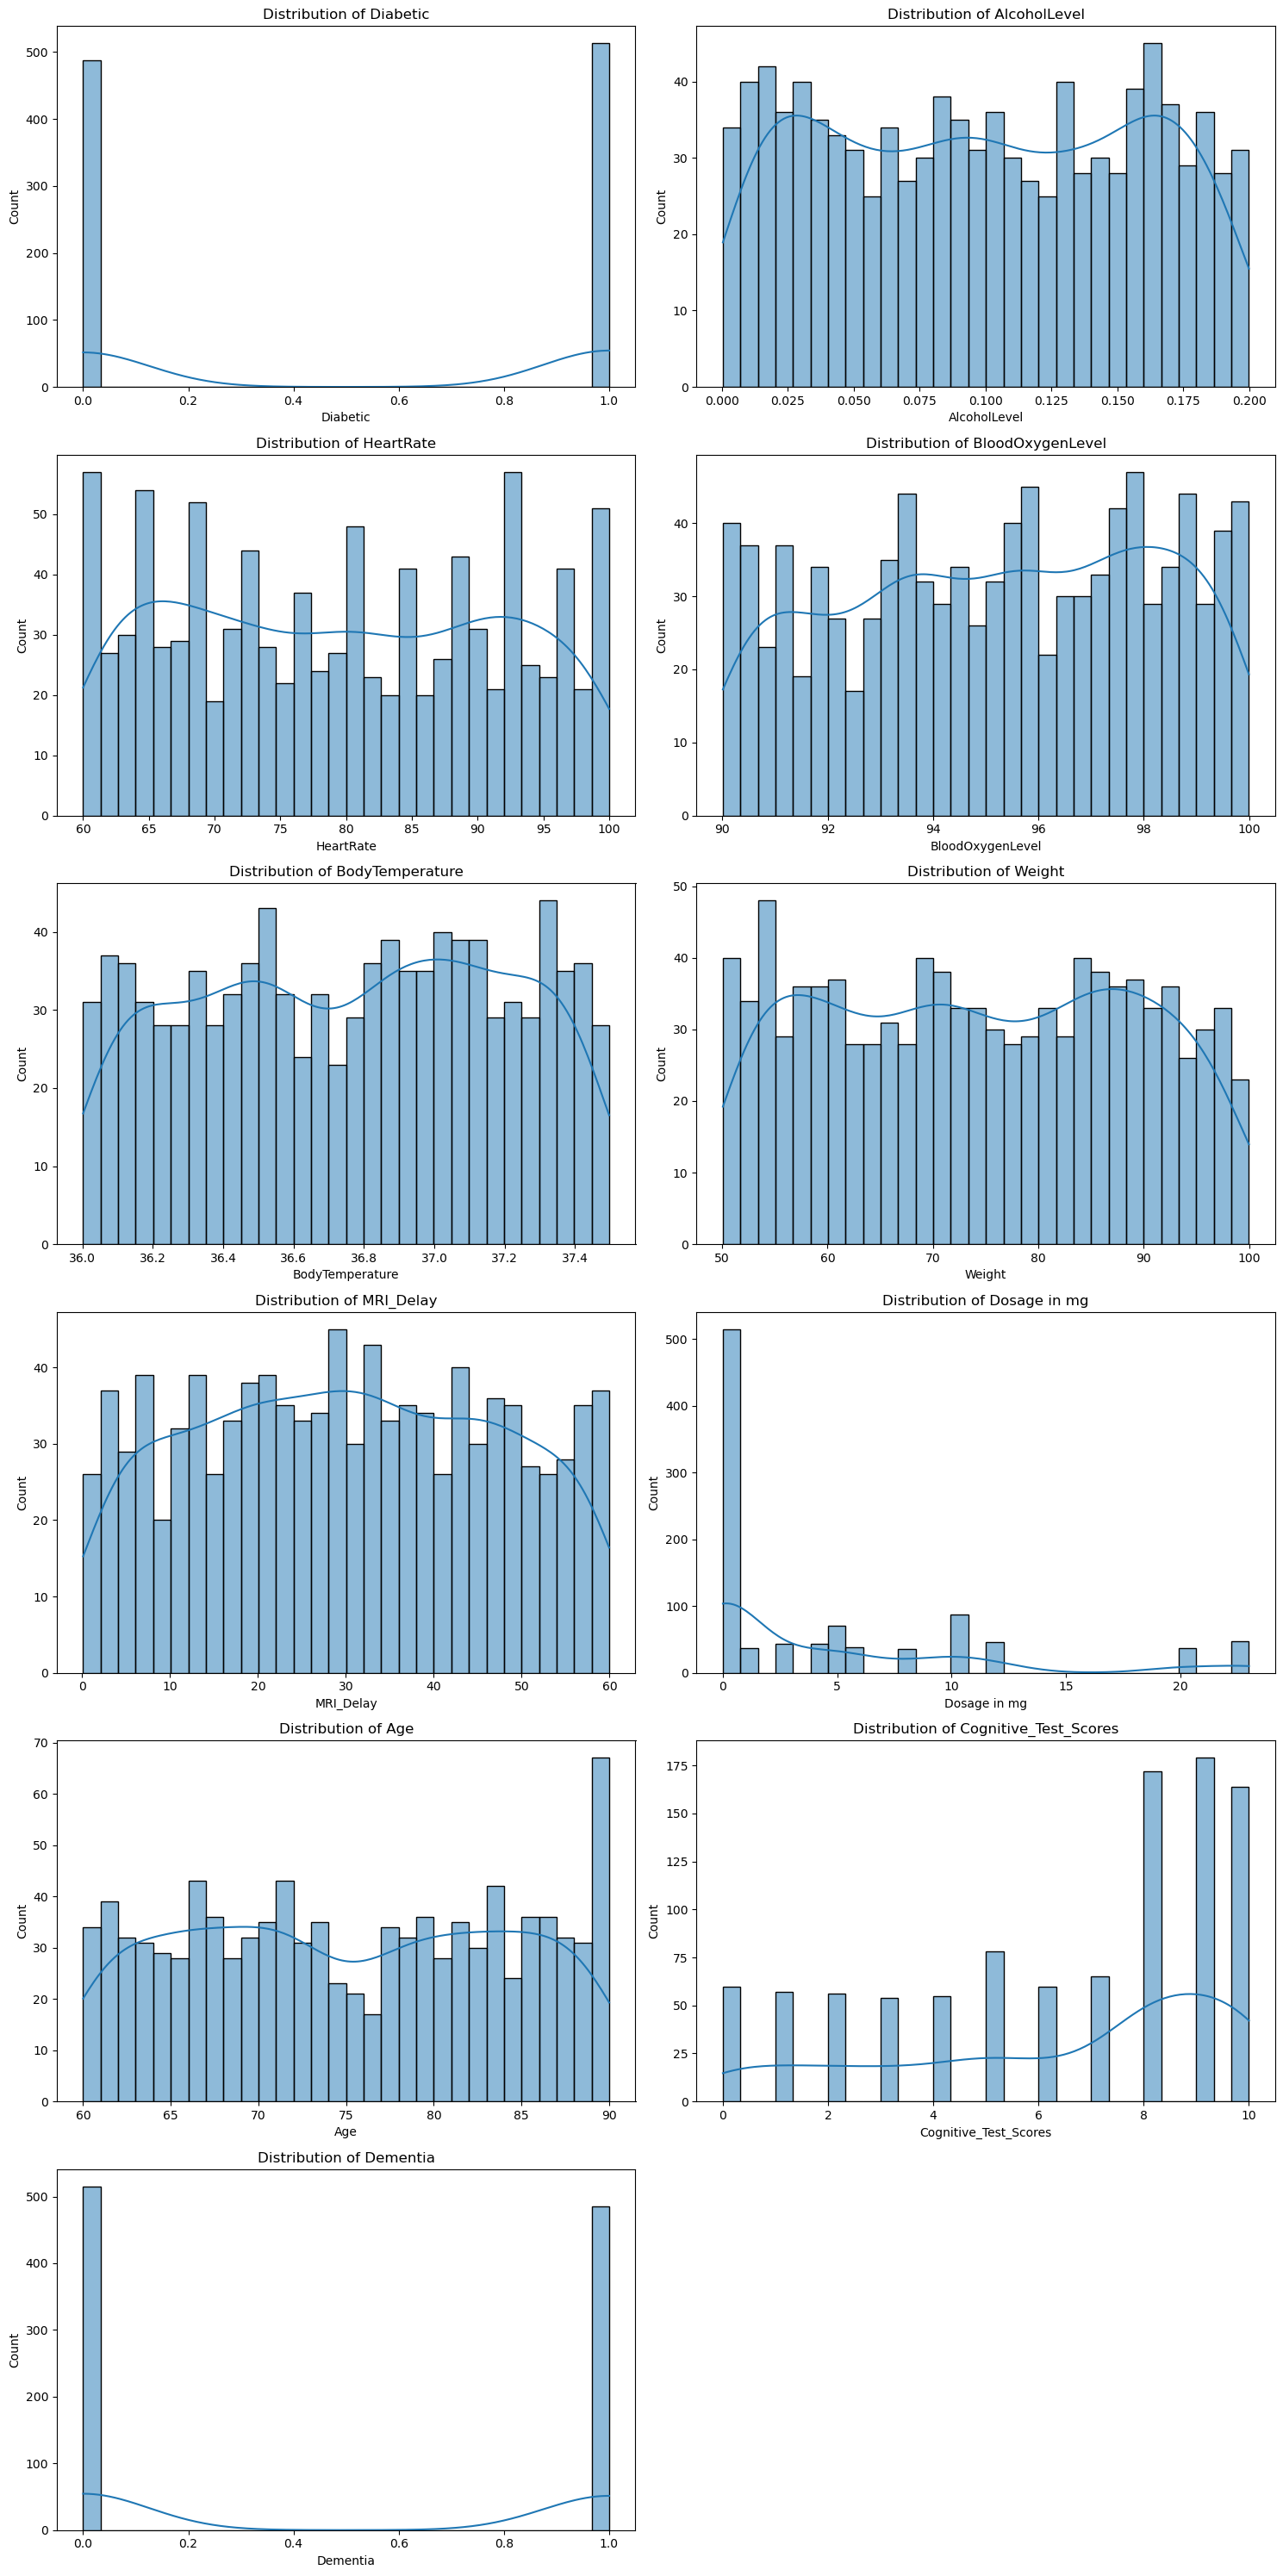

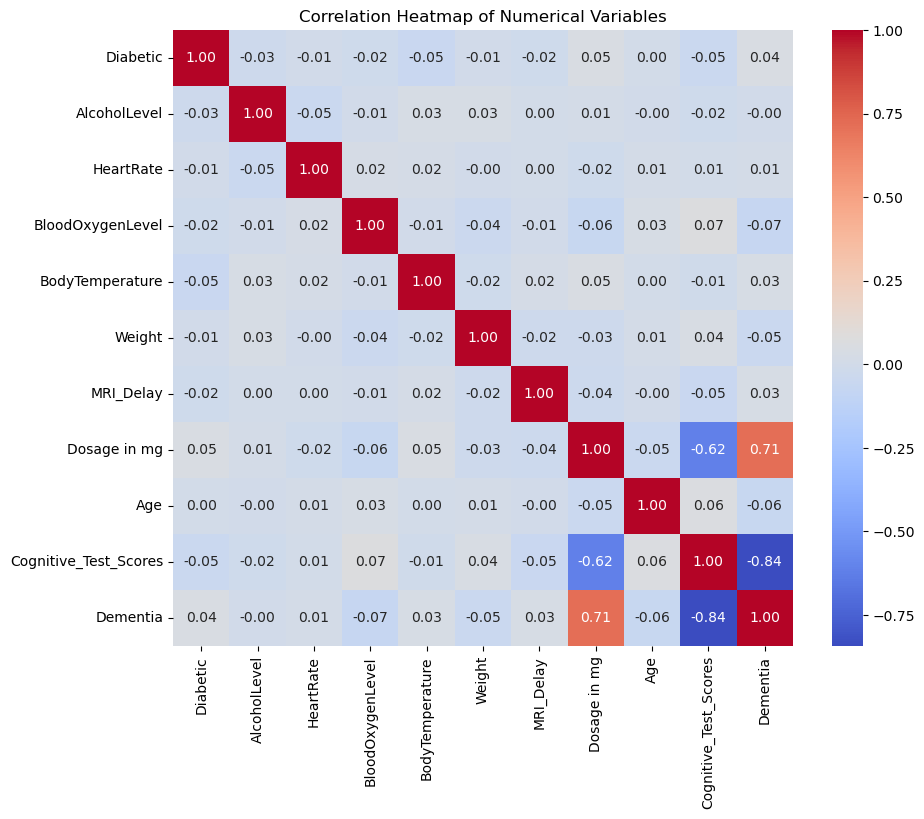

In [10]:
# Calculate the required number of rows to fit all numerical columns
num_plots = len(numerical_cols)
num_rows = (num_plots // 2) + (num_plots % 2)

# Plotting histograms for selected numerical variables
fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axs[i//2, i%2], kde=True, bins=30)
    axs[i//2, i%2].set_title(f'Distribution of {col}')

# If the number of plots is odd, hide the last subplot if unused
if num_plots % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Separating Features from Target

In [11]:
# Separate features from target, and convert categorical data
X = df.drop('Dementia', axis=1)
X = pd.get_dummies(X)
y = df['Dementia']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# Review features
X.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,...,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,0.0,60,10,...,False,False,True,False,False,True,True,False,False,False
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,12.0,61,1,...,True,False,True,False,False,True,False,True,False,False
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,0.0,69,8,...,False,False,False,True,False,True,False,True,False,False
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,23.0,78,5,...,True,True,False,False,False,True,False,False,True,False
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,20.0,77,0,...,True,False,True,False,True,False,True,False,False,False


### StandardScaler Instance

In [13]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Mean Cross-Validation Accuracy: 1.0
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 1.0
Test Accuracy: 1.0


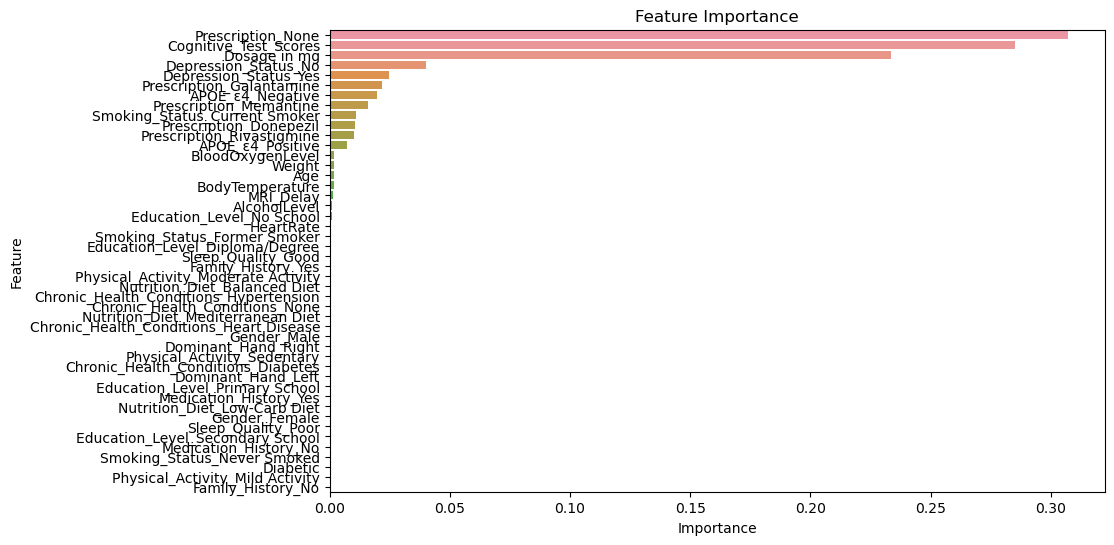

In [15]:
# Separate features from target, and convert categorical data
X = df.drop('Dementia', axis=1)
X = pd.get_dummies(X)
y = df['Dementia']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier using cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Accuracy:", mean_cv_score)

# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model on the test set
test_accuracy = grid_search.best_estimator_.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

# Get feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()